In [2]:
import sys
sys.path.append('..')
sys.path.append('../..')
sys.path.append('../../..')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM  # perform F test

import selective_recruitment.globals as gl
# import Functional_Fusion.Functional_Fusion.dataset as ds 

from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [3]:
# setting the directories
behav_dir = 'A:\\data\\Cerebellum\\CerebellumWorkingMemory\\data\\fmri'
wkdir = 'A:\data\Cerebellum\CerebellumWorkingMemory\selective_recruit'

# Analysis of Behvioral performance inside the scanner

## Motor task

In [55]:
# # get the behavioral dataframe
df = pd.read_csv(behav_dir + "/df_fs.tsv", sep = "\t")

D_fs = pd.DataFrame()
D_fs["sn"] = df.sn
D_fs["Force"] = df["ForceB"].map({1: "L", 2: "M", 3: "H"})
D_fs["Speed"] = df["SpeedB"].map({1: "L", 2: "M", 3: "H"})
D_fs["isError"] = df["isError"]
D_fs["cond_name"] = D_fs["Force"]+"F" + "_" + D_fs["Speed"] + "S"

D_fs["isCorrect"] = 1 - D_fs["isError"] 

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  9.1187 4.0000 28.0000 0.0001



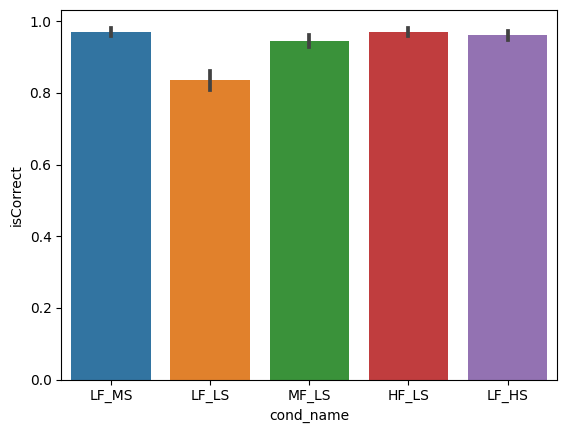

In [56]:
plotvar = "isCorrect"
sns.barplot(data = D_fs, x = "cond_name", y =  plotvar, errorbar="se")
plt.savefig("fs_behaviour_percent_correct.pdf")
print(AnovaRM(data=D_fs, depvar=plotvar,subject='sn', within=['cond_name'], aggregate_func=np.mean).fit())


### BOLD activation vs behavioral performance